# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading data 1/1
2. Correlational structure 4/4
3. Principal Component analysis 3/3
4. Associating with Flanker task performance 4/4
5. Reflection 2/2

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [ ]:
install.packages('pls')
library(pls)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder.

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
data <- read.csv('/unrestricted_trimmed_1_7_2020_10_50_44 (2).csv')
d1 <- data %>%
  select('Flanker_Unadj', ends_with('_Vol', ignore.case = TRUE, vars = NULL)) %>%
  drop_na() %>%
  select_if(~!all(. == 0))
head(d1)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
2,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
3,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
4,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
5,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
6,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [ ]:
fs_cor <- cor(d1[,-1])

(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [ ]:
install.packages('reshape2')
library(reshape2)
fs_cor <- melt(fs_cor)
head(fs_cor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

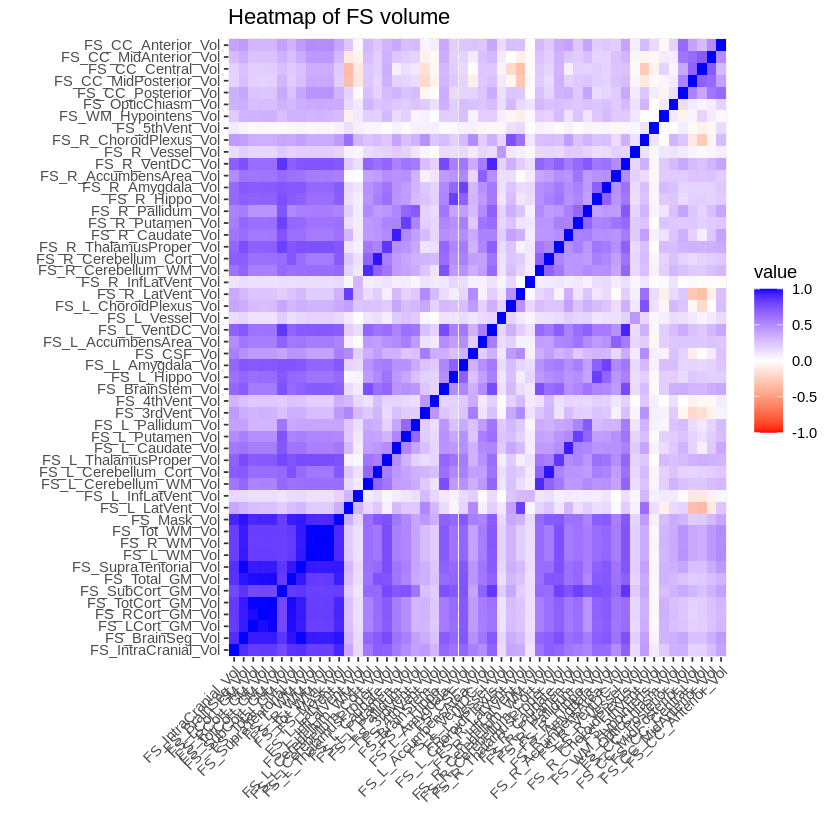

In [ ]:
ggplot(fs_cor, aes(x=Var1,y=Var2, fill=value)) +
  geom_tile() +
  scale_x_discrete(guide = guide_axis(angle = 45)) +
  scale_fill_gradient2(low='red',high='blue',limits = c(-1, 1)) +
  labs(title='Heatmap of FS volume', x='', y='')

What patterns do you see in the correlations?

>
> There are clear networks that are shown via darker boxes/correlations between certain regions and minimal correlation between other regions.


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [ ]:
fs_d.pca <- prcomp(d1[,-1], scale = TRUE)

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

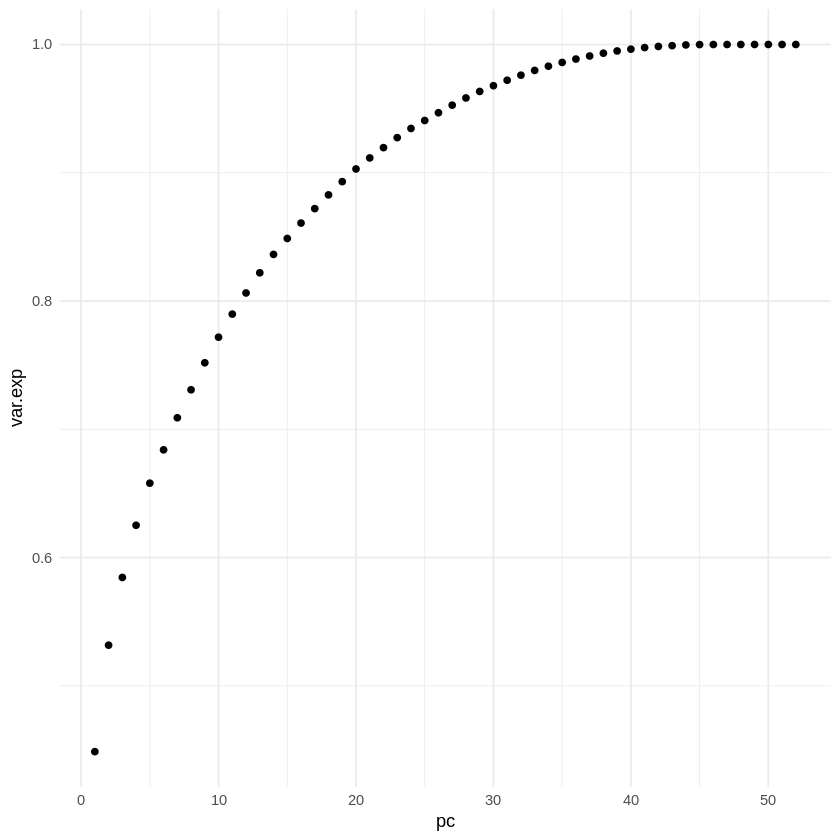

In [ ]:
var.exp <- cumsum(fs_d.pca$sdev^2 / sum(fs_d.pca$sdev^2))

ggplot(data.frame(pc = 1:length(var.exp), var.exp = var.exp),
aes(x = pc, y = var.exp)) +
  geom_point() +
    theme_minimal()

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function.

In [ ]:
threshold_pcs <- min(which(var.exp > 0.95))
threshold_pcs

[1] 27

What does this tell you about the underlying dimensionality of the brain volume measures?

> *27 dimensions contribute to brain volume.
> *


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [ ]:
set.seed(2)
pcr.fit=pcr(Flanker_Unadj~., data=d1 ,scale=TRUE, validation ="CV")
summary(pcr.fit)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

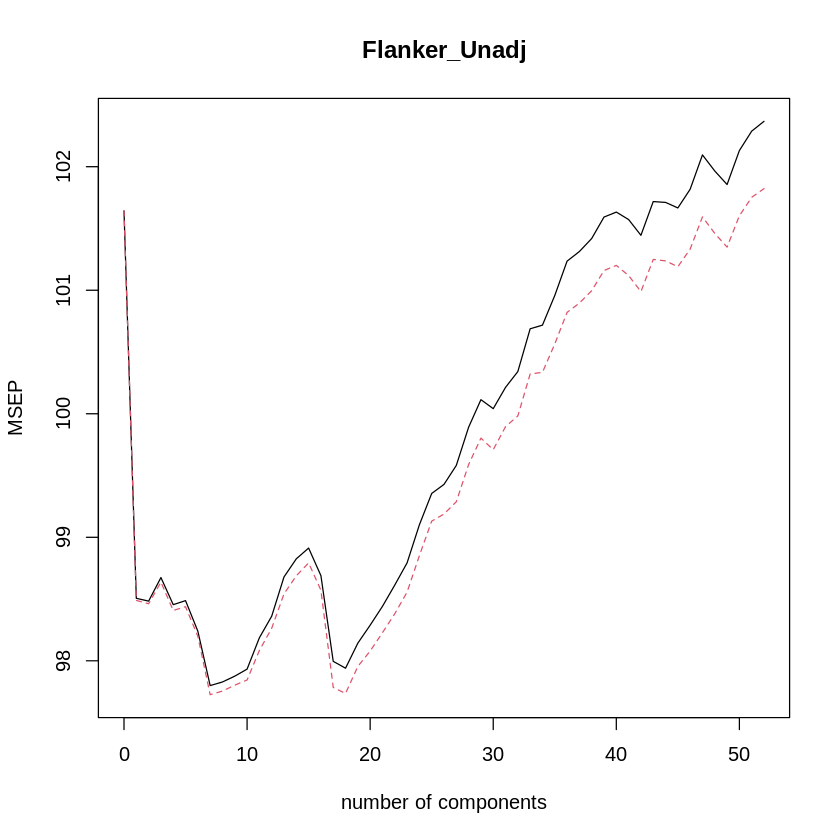

In [ ]:
validationplot(pcr.fit,val.type="MSEP")

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [ ]:
mseps <- MSEP(pcr.fit, estimate = "CV")
mseps <- drop(mseps)

min_msep <- which.min(mseps[[1]])
min_msep

[1] 8

What what does this plot tell you about how many components best explain variance in Flanker task performance?

> There are 8 components that best explain the variance in Flanker task performance.
> *

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> There are 27 components that explain the variance in brain volumes alone, but there are only 8 that explain Flanker task performance. This tells me that the variation in brain volumes does not relate much to task performance as there is much more variation.

>

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*